In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import joblib

In [6]:
train_data_identity = pd.read_csv('../input/ieee-fraud-detection/train_identity.csv')
train_data_transaction = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv')
test_data_identity = pd.read_csv('../input/ieee-fraud-detection/test_identity.csv')
test_data_transaction = pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv')

In [8]:
train_data_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [9]:
pd.set_option('display.max_columns', None)
train_data_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

# Visualizing and Dealing with NaN

In [14]:
# combining the datasets
combined_train_dataset = train_data_transaction.merge(train_data_identity, how='inner',on='TransactionID') # I know this drops like 400000 rows...

In [15]:
len(combined_train_dataset['TransactionID'])

144233

In [16]:
combined_train_dataset.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [21]:
columnsToDelete = []
for col in combined_train_dataset.columns:
    if(combined_train_dataset[col].isnull().sum()/len(combined_train_dataset[col]) >= 0.8):
        print(col, "% NaN:", combined_train_dataset[col].isnull().sum()/len(combined_train_dataset[col]))
        columnsToDelete.append(col)

dist1 % NaN: 1.0
D11 % NaN: 1.0
M1 % NaN: 1.0
M2 % NaN: 1.0
M3 % NaN: 1.0
M5 % NaN: 1.0
M6 % NaN: 1.0
M7 % NaN: 1.0
M8 % NaN: 1.0
M9 % NaN: 1.0
V1 % NaN: 1.0
V2 % NaN: 1.0
V3 % NaN: 1.0
V4 % NaN: 1.0
V5 % NaN: 1.0
V6 % NaN: 1.0
V7 % NaN: 1.0
V8 % NaN: 1.0
V9 % NaN: 1.0
V10 % NaN: 1.0
V11 % NaN: 1.0
id_07 % NaN: 0.9642592194574058
id_08 % NaN: 0.9642592194574058
id_21 % NaN: 0.9642314865530079
id_22 % NaN: 0.9641621542920136
id_23 % NaN: 0.9641621542920136
id_24 % NaN: 0.9670879757059757
id_25 % NaN: 0.9644186836576928
id_26 % NaN: 0.9642037536486102
id_27 % NaN: 0.9641621542920136


In [22]:
combinedToDelete = list(set(columnsToDelete + cols_not_in_test)) # 

In [23]:
combined_train_dataset = combined_train_dataset.drop(columns=combinedToDelete)

In [24]:
len(combined_train_dataset.columns)

373

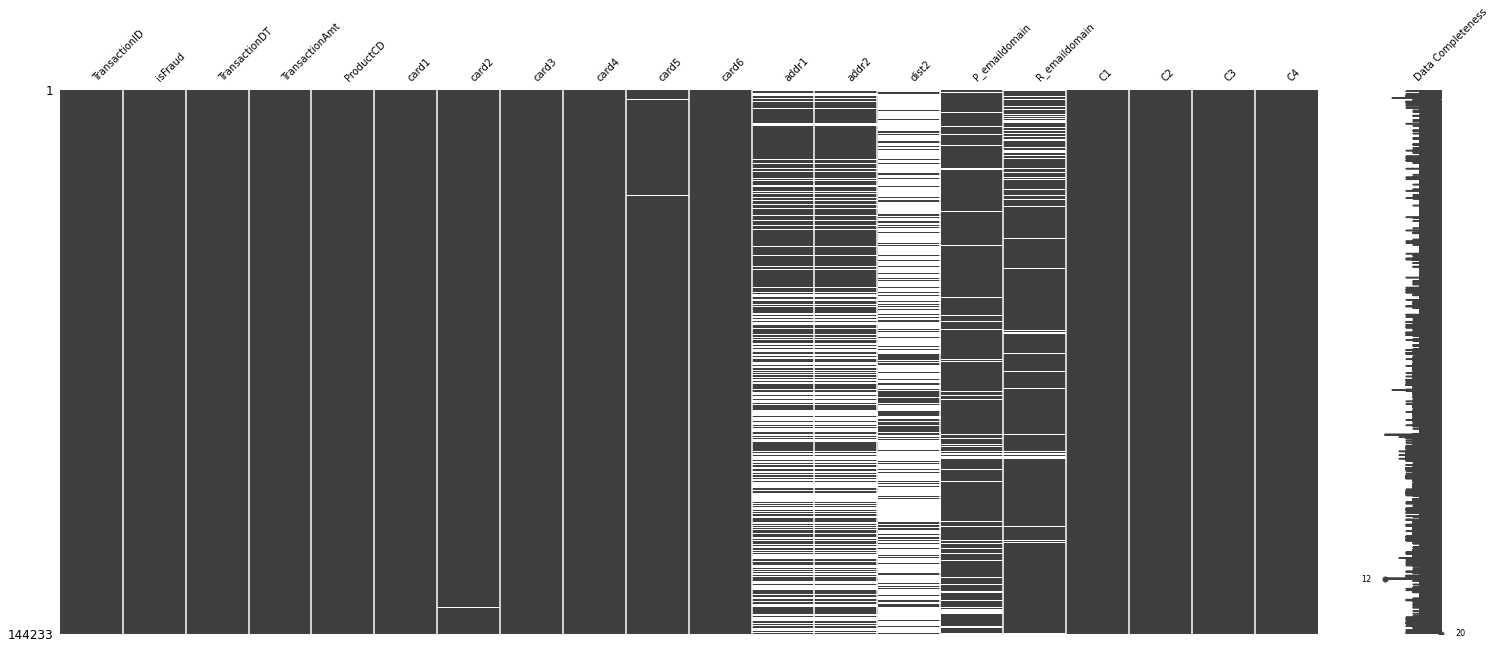

In [25]:
import missingno as msno
msno.matrix(combined_train_dataset.iloc[:,:20],labels=True,fontsize=10)

In [26]:
combined_train_dataset.iloc[:,:2]

,TransactionID,isFraud
0,2987004,0
1,2987008,0
2,2987010,0
3,2987011,0
4,2987016,0
...,...,...
144228,3577521,0
144229,3577526,1
144230,3577529,0
144231,3577531,0


In [27]:
# Already removed all columns with 80% or more NaN values, now I guess I'll just chuck vals into an imputer and see where it goes...
numericalCols = []
categoricalCols = []

for col in combined_train_dataset.columns:
    if(combined_train_dataset[col].dtype == 'object'):
        categoricalCols.append(col)
    else:
        numericalCols.append(col)
numericalCols.remove('isFraud')

# Train/Test, Pipeline, and Models

In [44]:
X = combined_train_dataset.drop(columns=['isFraud'])
y = combined_train_dataset['isFraud']

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numericalCols),
        ('cat', categorical_transformer, categoricalCols)
    ])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [47]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
classifiers = [
    GradientBoostingClassifier(random_state=0)
    ]

In [99]:
for cls in classifiers:
    # Bundle preprocessing and modeling code in a pipeline
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', cls)
                                 ])

    # Preprocessing of training data, fit model 
    print("Training" , cls)
    my_pipeline.fit(X_train, y_train)

    # Preprocessing of validation data, get predictions
    preds = my_pipeline.predict(X_test)

    # Evaluate the model
    score = accuracy_score(y_test, preds)
    print('Accuracy of',cls,":", score)

Training GradientBoostingClassifier(random_state=0)
Accuracy of GradientBoostingClassifier(random_state=0) : 0.9600931806206495


In [100]:
# save classifier or pipeline here !!!


joblib.dump(my_pipeline, 'my_pipeline.joblib')


['my_pipeline.joblib']

In [101]:
my_pipeline = joblib.load('my_pipeline.joblib')
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['TransactionID',
                                                   'TransactionDT',
                                                   'TransactionAmt', 'card1',
                                                   'card2', 'card3', 'card5',
                                                   'addr1', 'addr2', 'dist2',
                                                   'C1', 'C2', 'C3', 'C4', 'C5',
                                                   'C6', 'C7', 'C8', 'C9',
                                                   'C10', 'C11', 'C12', 'C13',
                                                   'C14', 'D1', 'D2', 'D3',
                                                   'D4', 'D5', 'D6', ...]),
                                                 ('cat',
          

Had to run this multiple times each time with different classifiers because there were some memory issues...

Here are the results

In [7]:
len(test_data_identity['TransactionID'])

141907

In [8]:
len(test_data_transaction['TransactionID'])

506691

In [9]:
test_data_identity_cpy = test_data_identity
test_data_transaction_cpy = test_data_transaction

In [10]:
test_data_transaction_cpy.merge(test_data_identity_cpy, how='outer',on='TransactionID')

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
columnsToDelete_cpy = columnsToDelete
for i in missingCols:
    try:
        columnsToDelete_cpy.remove(i)
    except:
        print(i, "not in list")
        
missingCols = ['id_07','id_08', 'id_21' ,'id_22', 'id_23' ,'id_24' ,'id_25' ,'id_26', 'id_27']

id_07 not in list
id_08 not in list
id_21 not in list
id_22 not in list
id_23 not in list
id_24 not in list
id_25 not in list
id_26 not in list
id_27 not in list


In [29]:
test_data_transaction_cpy = test_data_transaction_cpy.drop(columns=columnsToDelete_cpy)

In [30]:
len(test_data_transaction_cpy.columns)

372

In [49]:
len(X_test.columns)

372

In [19]:
cols_not_in_test = []
for i in train_data_identity.columns:
    if i not in test_data_transaction_cpy.columns:
        cols_not_in_test.append(i)

In [32]:
cols_not_in_test

['id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

In [33]:
len(combined_train_dataset.columns)

373

In [34]:
len(test_data_transaction_cpy.columns)

372

In [35]:
# What cols are in test that are not in train and vice versa?
columnsToDelete = []
for col in combined_train_dataset:
    if col not in test_data_transaction_cpy.columns:
        columnsToDelete.append(col)
for col in test_data_transaction_cpy:
    if col not in combined_train_dataset.columns:
        columnsToDelete.append(col)
columnsToDelete.remove('isFraud')

In [115]:
combined_train_dataset = combined_train_dataset.drop(columns=columnsToDelete,errors='ignore')
test_data_transaction_cpy = test_data_transaction_cpy.drop(columns=columnsToDelete,errors='ignore')

In [116]:
len(combined_train_dataset.columns)

373

In [36]:
len(test_data_transaction_cpy.columns)

372

In [4]:
my_pipeline = joblib.load('my_pipeline.joblib')
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['TransactionID',
                                                   'TransactionDT',
                                                   'TransactionAmt', 'card1',
                                                   'card2', 'card3', 'card5',
                                                   'addr1', 'addr2', 'dist2',
                                                   'C1', 'C2', 'C3', 'C4', 'C5',
                                                   'C6', 'C7', 'C8', 'C9',
                                                   'C10', 'C11', 'C12', 'C13',
                                                   'C14', 'D1', 'D2', 'D3',
                                                   'D4', 'D5', 'D6', ...]),
                                                 ('cat',
          

In [37]:
predictions = my_pipeline.predict(test_data_transaction_cpy)

In [38]:
transactionIDs = test_data_transaction_cpy['TransactionID'].values

In [39]:
submit_df = pd.DataFrame(data=transactionIDs,columns=['TransactionID'])
submit_df['isFraud'] = predictions
submit_df = submit_df.set_index('TransactionID')

In [40]:
submit_df['isFraud'].value_counts()

0    496107
1     10584
Name: isFraud, dtype: int64

In [52]:
submit_df.T

TransactionID,3663549,3663550,3663551,3663552,3663553,3663554,3663555,3663556,3663557,3663558,...,4170230,4170231,4170232,4170233,4170234,4170235,4170236,4170237,4170238,4170239
isFraud,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
submit_df.to_csv('submission_v1.csv')